# Malicious ClusterScan

Describes/summarizes the or set of clusters. Useful for when you aim to enlist the summarized malware types found in each cluster in order by Type # as presented in VirusTotal such that the first ones on the list per cluster are Type 1 (most popular), followed by Type 2 then Type 3 (least popular).

Note that this notebook only makes use of the verified xxxx_SampleHash_Common.csv file which represents a significant majority of the entire Oliveira dataset.  

## Import Libraries/Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.rcParams["figure.autolayout"] = True

malicious_df = pd.read_csv('./Clean_Manual_DBSCAN_SampleHash_Common.csv', low_memory=False, index_col=False) #This should point to a VirusTotal verified <Data Clustering>_SampleHash_Common.csv file

#Load list of API calls
API_LIST = "../api_calls.txt"
DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

def list_to_str(ls:list):
    output = ""
    for l in ls:
        output += str(l) + " "
    return output[0:len(output)-1]

def inject_patterns(inner_df:pd.DataFrame):
    patterns = []
    for row in range(inner_df.shape[0]):
        patterns.append(list_to_str(inner_df.iloc[row,2:5].transpose().to_list()))
    inner_df['type_pattern'] = patterns
    return inner_df

def get_unique_clusters(df:pd.DataFrame):
    return list(df['cluster'].unique())

def get_summary(df:pd.DataFrame):
    #Identify the overall list of types each cluster is as designated by VirusTotal.
    unique_clusters = get_unique_clusters(df)
    summary = []
    for u in unique_clusters:
        cluster_sublist = [u]
        df_copy = malicious_df[malicious_df['cluster'] == u].copy(deep=True)
        idx = list(df_copy['Type 1'].value_counts().index)
        counts = list(df_copy['Type 1'].value_counts())
        type_sublist = []
        for i in range(len(idx)):
            type_sublist.append([idx[i], counts[i]])
        cluster_sublist.append(type_sublist)
        # str_summary = []
        # cluster_sublist.append(list(df_copy['type_pattern'].value_counts().index))
        # cluster_sublist.append(list(df_copy['type_pattern'].value_counts()))
        summary.append(cluster_sublist)
    return summary

DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

from sklearn.preprocessing import LabelEncoder
#Inverse Label Encoding
def inverse_label(item):
    global APIS
    return item.map(lambda x: APIS[int(x)])
oliveira = pd.read_csv('../oliveira.csv', low_memory=False)
oliveira.iloc[:, 1:101] = oliveira.iloc[:, 1:101].apply(inverse_label, axis=1, result_type='reduce')

def how_many_clusters():
    c = malicious_df['cluster'].unique()
    c.sort()
    print("Number of Clusters:", c.size)
    c = malicious_df['cluster'].value_counts(ascending=True)
    print("Number of single-item Clusters:", c[c==1].count())
    print("Number of Samples Remaining:", malicious_df.shape[0])

C:\Users\ejose\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## DataFrame Preview

,cluster,hash,Type 1,Type 2,Type 3,pattern
0,0,071e8c3f8922e186e57548cd4c703a5d,trojan,_,_,"RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClos..."
1,1,33f8e6d08a6aae939f25a8e0d63dd523,pua,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."
2,2,b68abd064e975e1c6d5f25e748663076,trojan,_,_,"SetUnhandledExceptionFilter,OleInitialize,LdrL..."
3,3,72049be7bd30ea61297ea624ae198067,trojan,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."
4,4,c9b3700a77facf29172f32df6bc77f48,trojan,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
5,5,cc6217be863e606e49da90fee2252f52,trojan,_,_,"LdrGetProcedureAddress,NtAllocateVirtualMemory..."
6,6,f7a1a3c38809d807b3f5f4cc00b1e9b7,downloader,_,_,"NtClose,NtOpenKey,NtQueryValueKey,NtClose,NtOp..."
7,7,164b56522eb24164184460f8523ed7e2,adware,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
8,8,56ae1459ba61a14eb119982d6ec793d7,adware,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
9,9,c4148ca91c5246a8707a1ac1fd1e2e36,downloader,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."


(42797, 6)

<Axes: ylabel='Type 1'>

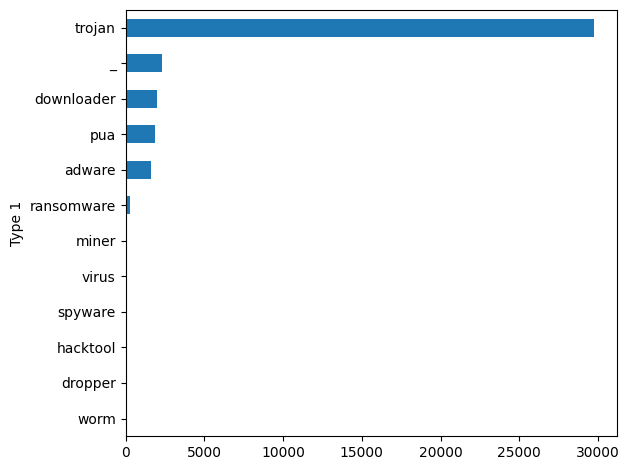

In [2]:
#Replace '-' empty malware type delimiter with '_' for consistency
malicious_df.replace(to_replace='-',value='_', inplace=True)
display(malicious_df.head(10))
display(malicious_df.shape)
malicious_df['Type 1'].value_counts(ascending=True).plot(kind='barh')

In [3]:
#INJECT PATTERN (i.e., summarized malware type pattern) to the DataFrame
malicious_df = inject_patterns(malicious_df)

print("Raw Clustered malicious samples")
how_many_clusters()

#DROP ROWS THAT ARE FALSELY LABELLED. (i.e. '_' on all popularity levels of VirusTotal)
malicious_df.drop(malicious_df[(malicious_df['Type 1']=='_')].index, inplace=True)

print("After removing falsely labelled malicious samples")
how_many_clusters()

Raw Clustered malicious samples
Number of Clusters: 12597
Number of single-item Clusters: 10413
Number of Samples Remaining: 42797
After removing falsely labelled malicious samples
Number of Clusters: 11668
Number of single-item Clusters: 9677
Number of Samples Remaining: 40491


## How many clusters are there?

In [4]:
#Prior to noise removal

print("Prior to noise removal")
how_many_clusters()

Prior to noise removal
Number of Clusters: 11668
Number of single-item Clusters: 9677
Number of Samples Remaining: 40491


In [5]:
# DROP ROWS WITH NA TO HAVE CLEAN CLUSTERS
import numpy as nan
malicious_df.dropna(inplace=True, subset=['Type 1'])
malicious_df['Type 1'].unique()

# DROP CLUSTERS WITH MORE THAN 1 MALWARE TYPE UNDER IT (i.e. NOISE)
# unique_clusters = get_unique_clusters(malicious_df)
# for u in unique_clusters:
#     if len(malicious_df[malicious_df['cluster'] == u]['Type 1'].unique()) > 1:
#         malicious_df = malicious_df.drop(malicious_df[malicious_df['cluster'] == u].index)
# malicious_df.head()

print("After removing yet unlabelled malicious samples\n and clusters with more than 1 malware type")
how_many_clusters()

After removing yet unlabelled malicious samples
 and clusters with more than 1 malware type
Number of Clusters: 10382
Number of single-item Clusters: 8628
Number of Samples Remaining: 35760


In [6]:
# REMOVE SINGLE ITEM CLUSTERS
unique_clusters = get_unique_clusters(malicious_df)
for u in unique_clusters:
    if malicious_df[malicious_df['cluster'] == u].shape[0] == 1:
        malicious_df = malicious_df.drop(malicious_df[malicious_df['cluster'] == u].index)

print("After removing single-item clusters")
how_many_clusters()

After removing single-item clusters
Number of Clusters: 1754
Number of single-item Clusters: 0
Number of Samples Remaining: 27132


## "What Malware Types can be found in the overall dataset?"

### This is regardless of cluster.

Type 1
trojan        22150
downloader     1961
pua            1407
adware         1191
ransomware      289
miner            68
spyware          37
virus            22
dropper           4
hacktool          3
Name: count, dtype: int64

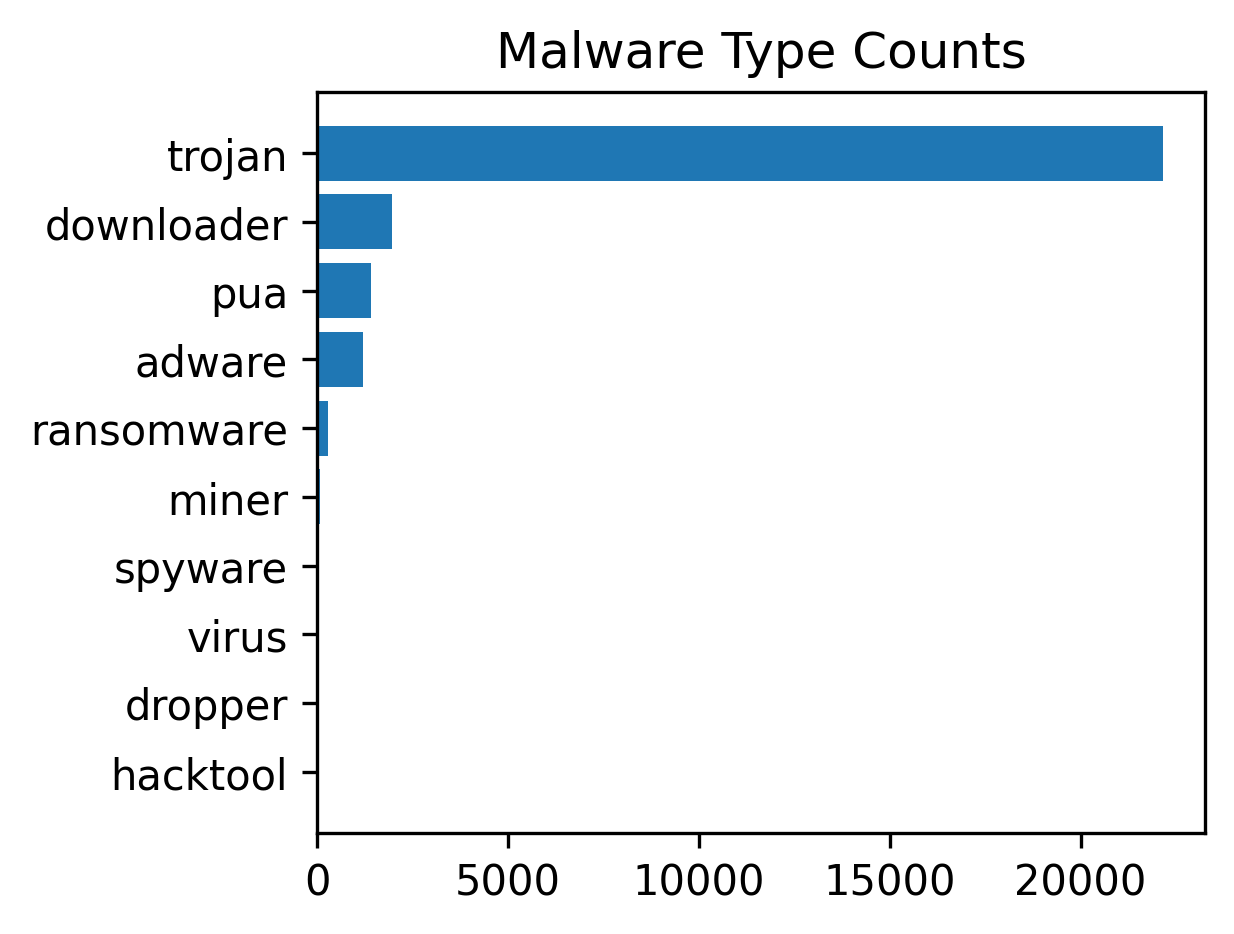

In [7]:
output = malicious_df['Type 1'].value_counts()
str_output = str(output) + "\n\n"
with open("./Output/1 MalwareTypes_in_Dataset.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
display(output)
fig, axs = plt.subplots(nrows=1, layout='constrained')
fig.set_figwidth(4)
fig.set_figheight(3)
fig.set_dpi(300)
axs.set_title('Malware Type Counts')
axs.barh(malicious_df['Type 1'].value_counts().index, malicious_df['Type 1'].value_counts())
axs.invert_yaxis()
# axs[1].set_title('Type 2 Malware Type Counts')
# axs[1].invert_yaxis()
# axs[1].barh(malicious_df['Type 2'].value_counts().index, malicious_df['Type 2'].value_counts())
# axs[2].invert_yaxis()
# axs[2].set_title('Type 3 (Least \'Popular\') Malware Type Counts')
# axs[2].barh(malicious_df['Type 3'].value_counts().index, malicious_df['Type 3'].value_counts())
plt.savefig("./Output/1 Popular Malware Types in Dataset.png")

## "What Malware Types are there in each cluster?"


### Identify the counts of Malware Types per Cluster

This indicates the malware types (including the # of instances) found in each cluster.

In [8]:
str_output = ""
summary = get_summary(malicious_df)
summary.sort()
for s in summary:
    str_output += f"CLUSTER {s[0]}: "
    for t in s[1]:
        str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 2: "
    # for t in s[2]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 3: "
    # for t in s[3]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tMost Popular Malware Type Combination (in order Most to Least):\n"
    # for i,t in enumerate(s[4]):
    #     str_output += f"\t    {i+1} {t:12s} ({s[5][i]})\n"
    str_output += "\n"
with open("./Output/1 MalwareType_per_Cluster.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

CLUSTER 0: trojan (2935); pua (6); adware (2); spyware (1); downloader (1); 
CLUSTER 1: pua (88); trojan (16); adware (4); downloader (3); 
CLUSTER 2: trojan (6); 
CLUSTER 6: downloader (144); trojan (7); adware (2); virus (1); 
CLUSTER 8: trojan (399); adware (30); pua (1); 
CLUSTER 9: downloader (846); pua (100); trojan (21); adware (9); ransomware (1); 
CLUSTER 10: trojan (15); adware (3); virus (2); downloader (2); pua (2); hacktool (1); 
CLUSTER 11: trojan (9); 
CLUSTER 13: trojan (299); adware (8); pua (1); 
CLUSTER 16: trojan (22); 
CLUSTER 17: trojan (11); 
CLUSTER 19: trojan (605); adware (24); pua (5); downloader (2); 
CLUSTER 20: trojan (2); 
CLUSTER 21: trojan (460); adware (50); pua (3); 
CLUSTER 23: trojan (147); downloader (90); pua (36); adware (28); dropper (1); 
CLUSTER 24: trojan (912); adware (10); pua (3); spyware (2); 
CLUSTER 25: trojan (28); 
CLUSTER 26: trojan (2); 
CLUSTER 27: trojan (418); downloader (2); pua (2); adware (1); 
CLUSTER 29: trojan (56); downloa

### Identify the Clusters that have the same Unique Malware Type

This indicates what clusters have verified malicious samples that match specific Malware Types.

This indicates the most occuring Malware Type which extends to the most 'popular' malware type that is probably found in the dataset.

Such findings may also be used as a reflection as to what malware types are most prevalent in the wild.

In [9]:
# Summarize Clusters that have the same malware types as per VirusTotal.
str_output = f"# of Unique Malware Type: {len(malicious_df['Type 1'].unique())}" + "\n\n"

cluster_instance_summary = [0] * len(list(malicious_df['cluster'].unique()))
count_summary = []
for i, u in enumerate(list(malicious_df['Type 1'].unique())):
    matching = malicious_df[malicious_df['Type 1'] == u]['cluster']
    count_summary.append([u, len(list(matching)), len(list(matching.unique())) ,str(list(matching.unique()))])
    str_output += f"Unique Malware Type: {i+1}".upper() + "\n"
    str_output += f"Malware Type: {u}" + "\n"
    str_output += f"Matching Clusters Count: {len(list(matching.unique()))}" + "\n"
    str_output += f"Matching Clusters: {list(matching.unique())}" + "\n"
    str_output += "\n"
with open("./Output/1 Clusters_on_Unique_MalwareType.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

count_summary.sort(key=lambda x: x[1])
count_summary = pd.DataFrame(count_summary, columns=['Malware Type', 'No. of Matching Verified Samples', 'No. of Matching Clusters', "Matching Clusters"])

count_summary.sort_values(by='No. of Matching Clusters',ascending=False, inplace=True)
display("Top 10 Most Common Malware Type (by Cluster Count)")
display(count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10])
count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10].to_csv("./Output/1 10_Most_Common_MalwareType_byClusterCount.csv", index=False)

# of Unique Malware Type: 10

UNIQUE MALWARE TYPE: 1
Malware Type: trojan
Matching Clusters Count: 1621
Matching Clusters: [0, 2, 11, 13, 16, 17, 19, 20, 21, 24, 25, 26, 27, 30, 35, 39, 40, 42, 43, 29, 44, 46, 47, 50, 52, 55, 8, 56, 57, 59, 60, 61, 63, 66, 67, 69, 72, 1, 76, 78, 79, 81, 83, 85, 86, 88, 89, 90, 91, 94, 96, 58, 100, 103, 104, 105, 106, 107, 108, 110, 111, 113, 119, 122, 124, 128, 129, 131, 132, 134, 139, 141, 142, 146, 147, 148, 149, 151, 152, 155, 156, 33, 161, 167, 169, 171, 172, 182, 183, 184, 185, 97, 188, 190, 192, 193, 194, 197, 199, 200, 202, 203, 209, 210, 215, 216, 217, 222, 223, 226, 237, 238, 239, 248, 253, 258, 259, 261, 262, 266, 270, 272, 274, 277, 281, 282, 283, 294, 297, 301, 302, 304, 306, 307, 308, 309, 312, 314, 208, 273, 322, 326, 329, 331, 333, 334, 335, 337, 340, 343, 344, 345, 351, 355, 359, 360, 23, 365, 366, 367, 368, 369, 370, 373, 374, 375, 376, 377, 381, 386, 388, 389, 390, 393, 396, 397, 400, 406, 410, 416, 417, 419, 420, 422, 424, 427, 428, 

'Top 10 Most Common Malware Type (by Cluster Count)'

,Malware Type,No. of Matching Clusters,Matching Clusters
9,trojan,1621,"[0, 2, 11, 13, 16, 17, 19, 20, 21, 24, 25, 26,..."
6,adware,287,"[8, 58, 93, 23, 166, 170, 196, 218, 249, 279, ..."
7,pua,249,"[1, 33, 48, 97, 98, 113, 29, 191, 228, 232, 23..."
8,downloader,66,"[6, 9, 29, 23, 45, 73, 82, 109, 158, 218, 224,..."
4,miner,28,"[87, 285, 945, 108, 50, 2013, 254, 2285, 1489,..."
5,ransomware,14,"[204, 207, 197, 384, 741, 1753, 3010, 1125, 41..."
2,virus,12,"[95, 6, 10, 475, 404, 4353, 97, 201, 5827, 133..."
3,spyware,10,"[101, 0, 24, 210, 653, 3996, 1715, 6440, 2171,..."
0,hacktool,3,"[10, 1380, 1341]"
1,dropper,3,"[302, 23, 2199]"


## "What the API Calls are in each Malware Type"

In [10]:
malware_types = count_summary['Malware Type'].to_list()
malware_apis = []

pd.set_option("display.max_rows", None)

print("Top 10 API CALLS PER MALWARE TYPE")
for m in malware_types:
    hashes = malicious_df[malicious_df['Type 1'] == m]['hash'].to_list()
    complete = []
    for h in hashes:
        complete += oliveira[oliveira['hash']==h].iloc[0,1:101].to_list()
    ser = pd.Series(complete, name=m)
    ser.value_counts().to_csv(f"./Output/1_APICALL_{m}.csv")
    malware_apis.append(ser.unique().tolist())
    display(ser.value_counts())

Top 10 API CALLS PER MALWARE TYPE


trojan
LdrGetProcedureAddress               359044
LdrLoadDll                           215865
LdrGetDllHandle                      149734
LoadResource                         142728
FindResourceExW                      141661
RegOpenKeyExW                        139812
NtClose                              107555
RegQueryValueExW                      97159
RegCloseKey                           86367
NtAllocateVirtualMemory               75549
NtQueryValueKey                       57623
NtOpenKey                             56516
GetSystemMetrics                      50216
GetSystemTimeAsFileTime               29318
SetErrorMode                          27967
GetSystemInfo                         21706
LoadStringW                           19866
RegQueryInfoKeyW                      19383
LoadStringA                           16173
FindFirstFileExW                      15492
NtProtectVirtualMemory                15124
NtCreateFile                          15105
DrawTextExW              

adware
LdrGetProcedureAddress               18945
LdrLoadDll                           11602
LdrGetDllHandle                       9696
RegOpenKeyExW                         7417
NtClose                               7177
RegCloseKey                           6261
RegQueryValueExW                      5533
NtAllocateVirtualMemory               4960
SetErrorMode                          4229
NtOpenKey                             3004
NtQueryValueKey                       2861
NtCreateFile                          2068
GetSystemWindowsDirectoryW            1827
GetSystemDirectoryW                   1803
GetSystemTimeAsFileTime               1600
NtMapViewOfSection                    1575
LoadResource                          1499
NtCreateSection                       1236
FindResourceExW                       1147
RegOpenKeyExA                         1130
NtFreeVirtualMemory                   1125
NtReadFile                            1116
SetFilePointer                         996
GetS

pua
LdrGetProcedureAddress               27055
LdrGetDllHandle                      14694
LdrLoadDll                           14550
NtClose                               8405
NtAllocateVirtualMemory               7159
RegOpenKeyExW                         6250
RegCloseKey                           5741
RegQueryValueExW                      4294
SetErrorMode                          4282
NtOpenKey                             3230
NtQueryValueKey                       3029
LoadResource                          2184
NtCreateFile                          2169
FindResourceExW                       2118
NtReadFile                            2114
GetSystemMetrics                      2056
SetFilePointer                        2044
GetSystemWindowsDirectoryW            1930
NtMapViewOfSection                    1856
GetSystemDirectoryW                   1793
NtFreeVirtualMemory                   1713
GetSystemTimeAsFileTime               1470
NtCreateSection                       1435
RegOpen

downloader
LdrGetProcedureAddress               53499
LdrGetDllHandle                      34934
LdrLoadDll                           17263
RegCloseKey                          10987
RegOpenKeyExW                         9669
NtAllocateVirtualMemory               9565
NtClose                               7281
RegQueryValueExW                      7277
FindResourceExW                       5852
LoadResource                          5838
RegOpenKeyExA                         3117
GetSystemTimeAsFileTime               2551
NtOpenKey                             2402
RegQueryValueExA                      2251
NtQueryValueKey                       2244
NtFreeVirtualMemory                   2190
GetSystemMetrics                      1784
GetSystemWindowsDirectoryW            1539
SetErrorMode                          1406
NtMapViewOfSection                    1187
SetUnhandledExceptionFilter           1159
LoadStringW                           1147
NtOpenProcess                         1033


miner
LdrGetProcedureAddress               613
NtClose                              498
LdrLoadDll                           367
NtQueryAttributesFile                336
LdrGetDllHandle                      334
RegOpenKeyExW                        317
NtCreateFile                         289
NtMapViewOfSection                   275
RegCloseKey                          268
NtCreateSection                      260
NtAllocateVirtualMemory              234
NtUnmapViewOfSection                 233
RegQueryValueExW                     226
SetFilePointer                       145
NtReadFile                           143
GetSystemDirectoryW                  138
GetSystemWindowsDirectoryW           136
GetSystemTimeAsFileTime              130
LdrUnloadDll                         119
LoadResource                         119
NtQueryValueKey                      119
NtOpenKey                            116
GetSystemInfo                        112
FindResourceExW                       81
WSAStartup

ransomware
NtQuerySystemInformation       6906
NtAllocateVirtualMemory        4687
NtFreeVirtualMemory            4245
NtClose                        1750
LdrGetProcedureAddress         1200
RegOpenKeyExW                   954
RegCloseKey                     939
RegQueryValueExW                938
NtOpenKey                       675
NtQueryValueKey                 614
LdrGetDllHandle                 605
LdrLoadDll                      601
NtCreateFile                    574
NtCreateSection                 551
NtMapViewOfSection              551
CreateThread                    375
NtOpenFile                      290
NtCreateMutant                  282
GetSystemWindowsDirectoryW      280
NtQueryInformationFile          280
GetFileSize                     276
CryptAcquireContextW            272
NtDelayExecution                272
GetTempPathW                    271
CreateToolhelp32Snapshot         86
Process32FirstW                  79
Process32NextW                   79
GetFileAttributes

virus
LdrGetProcedureAddress               238
NtReadFile                           212
NtWriteFile                          192
LdrLoadDll                           173
NtClose                              139
RegCloseKey                           91
LdrGetDllHandle                       89
NtAllocateVirtualMemory               86
RegOpenKeyExW                         81
FindResourceExW                       73
LoadResource                          68
RegQueryValueExW                      61
NtCreateFile                          57
NtOpenKey                             55
NtQueryValueKey                       53
SetErrorMode                          42
GetSystemMetrics                      37
SetFilePointer                        35
GetSystemWindowsDirectoryW            33
NtFreeVirtualMemory                   30
LoadStringA                           29
RegOpenKeyExA                         28
NtMapViewOfSection                    24
NtCreateSection                       19
GetSystemI

spyware
LdrGetProcedureAddress        623
FindResourceExW               502
LoadResource                  436
LdrGetDllHandle               333
LdrLoadDll                    309
GetSystemMetrics              169
NtClose                       161
NtAllocateVirtualMemory       155
LoadStringA                    98
RegCloseKey                    83
NtQueryValueKey                75
NtOpenKey                      71
RegOpenKeyExA                  70
DrawTextExW                    54
RegOpenKeyExW                  43
NtCreateFile                   38
NtCreateSection                38
RegQueryValueExA               36
GetSystemInfo                  35
GetSystemWindowsDirectoryW     33
NtMapViewOfSection             32
GetSystemDirectoryW            32
NtQueryAttributesFile          32
NtFreeVirtualMemory            30
CreateThread                   25
RegQueryValueExW               24
RegQueryInfoKeyW               15
WSAStartup                     13
NtProtectVirtualMemory         12
GetSys

hacktool
NtClose                        29
LdrGetProcedureAddress         27
LdrLoadDll                     25
RegCloseKey                    17
NtAllocateVirtualMemory        14
GetSystemDirectoryW            14
RegOpenKeyExW                  14
LdrGetDllHandle                13
NtCreateFile                   12
RegQueryValueExW               12
NtQueryValueKey                 8
NtOpenKey                       8
NtMapViewOfSection              7
SetFilePointer                  7
RegOpenKeyExA                   6
NtFreeVirtualMemory             6
NtReadFile                      6
GetSystemWindowsDirectoryW      6
NtCreateSection                 5
FindFirstFileExW                3
RegCreateKeyExA                 3
RegSetValueExW                  3
NtWriteFile                     3
NtCreateMutant                  3
DeviceIoControl                 3
GetSystemMetrics                3
SetErrorMode                    3
LoadStringA                     3
GetFileSize                     3
NtQue

dropper
LdrGetProcedureAddress               51
LdrLoadDll                           45
SetErrorMode                         34
RegOpenKeyExW                        32
RegCloseKey                          29
LdrGetDllHandle                      29
NtClose                              27
RegQueryValueExW                     25
NtOpenKey                            14
NtQueryValueKey                      14
GetSystemWindowsDirectoryW           13
NtAllocateVirtualMemory              12
GetSystemDirectoryW                   9
NtCreateFile                          7
NtMapViewOfSection                    6
NtQueryAttributesFile                 6
LoadStringW                           6
NtCreateSection                       5
NtCreateMutant                        4
GetNativeSystemInfo                   4
RegOpenKeyExA                         3
NtFreeVirtualMemory                   3
GetSystemTimeAsFileTime               3
CreateActCtxW                         3
SetUnhandledExceptionFilter     

## "What the Unique API Calls are in each Malware Type"

In [11]:
for i,m in enumerate(malware_types):
    print(i, m)
    m_list = malware_apis[i]
    for j in range(len(malware_apis)):
        if j != i:
            for k in m_list[:]:
                if k in malware_apis[j]:
                    m_list.remove(k)
    print(m_list)
    print("\n")

0 trojan
['LookupPrivilegeValueW', 'OpenServiceA', 'StartServiceA', 'GlobalMemoryStatus', 'CryptAcquireContextA', 'CryptProtectData', 'CryptEncrypt', 'GetAdaptersAddresses', 'GetBestInterfaceEx', 'GetVolumePathNamesForVolumeNameW', 'GetVolumePathNameW', 'StartServiceW', 'GetShortPathNameW', 'NtGetContextThread', 'GetSystemWindowsDirectoryA', 'RegEnumValueA', 'DrawTextExA', 'CreateServiceW', 'DeleteUrlCacheEntryA', 'CopyFileExW', 'CreateServiceA', 'NtSuspendThread', 'FindWindowA', 'SetStdHandle', 'gethostbyname', 'NtSetContextThread', 'InternetSetOptionA', 'NtCreateKey', 'NtSetValueKey', 'RegisterHotKey', 'Module32FirstW', 'Module32NextW', 'GetFileInformationByHandle', 'DnsQuery_A', 'send', 'recv', 'UnhookWindowsHookEx', 'InternetOpenW', 'GetKeyState', 'RtlDecompressBuffer']


1 adware
['RegQueryInfoKeyA', 'RegEnumKeyExA', 'GetComputerNameA', 'GetFileAttributesExW', 'GetUserNameA', 'OpenSCManagerW', 'OpenServiceW', 'CoCreateInstanceEx', 'CoGetClassObject', 'IWbemServices_ExecQuery', 'Nt